In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("BAJFINANCE.csv")

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [4]:
df.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

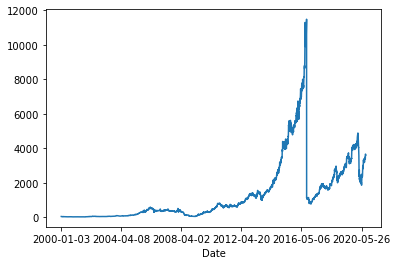

In [5]:
df['VWAP'].plot()

In [6]:
df.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799


In [9]:
df1=df.copy()

In [10]:
df1.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [11]:
 df1.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [12]:
lag_feature=['High','Low','Volume','Trades','Turnover']
window1=3
window2=7

In [13]:
for feature in lag_feature:
    df1[feature+'rolling_mean3']=df1[feature].rolling(window=window1).mean()
    df1[feature+'rolling_mean7']=df1[feature].rolling(window=window2).mean()

In [14]:
for feature in lag_feature:
    df1[feature+'rolling_std3']=df1[feature].rolling(window=window1).std()
    df1[feature+'rolling_std7']=df1[feature].rolling(window=window2).std()

In [15]:
df1.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std3,Highrolling_std7,Lowrolling_std3,Lowrolling_std7,Volumerolling_std3,Volumerolling_std7,Tradesrolling_std3,Tradesrolling_std7,Turnoverrolling_std3,Turnoverrolling_std7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,670.500559,NaN,1.685217e+12,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,148.769396,NaN,1.710136e+12,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,78.270897,NaN,1.652377e+12,NaN


In [16]:
df1.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean3', 'Highrolling_mean7',
       'Lowrolling_mean3', 'Lowrolling_mean7', 'Volumerolling_mean3',
       'Volumerolling_mean7', 'Tradesrolling_mean3', 'Tradesrolling_mean7',
       'Turnoverrolling_mean3', 'Turnoverrolling_mean7', 'Highrolling_std3',
       'Highrolling_std7', 'Lowrolling_std3', 'Lowrolling_std7',
       'Volumerolling_std3', 'Volumerolling_std7', 'Tradesrolling_std3',
       'Tradesrolling_std7', 'Turnoverrolling_std3', 'Turnoverrolling_std7'],
      dtype='object')

In [17]:
df1.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                   0
Deliverable Volume       0
%Deliverble              0
Highrolling_mean3        2
Highrolling_mean7        6
Lowrolling_mean3         2
Lowrolling_mean7         6
Volumerolling_mean3      2
Volumerolling_mean7      6
Tradesrolling_mean3      2
Tradesrolling_mean7      6
Turnoverrolling_mean3    2
Turnoverrolling_mean7    6
Highrolling_std3         2
Highrolling_std7         6
Lowrolling_std3          2
Lowrolling_std7          6
Volumerolling_std3       2
Volumerolling_std7       6
Tradesrolling_std3       2
Tradesrolling_std7       6
Turnoverrolling_std3     2
Turnoverrolling_std7     6
dtype: int64

In [18]:
df1.dropna(inplace=True)

In [19]:
ind_features=['Highrolling_mean3', 'Highrolling_mean7',
       'Lowrolling_mean3', 'Lowrolling_mean7', 'Volumerolling_mean3',
       'Volumerolling_mean7', 'Tradesrolling_mean3', 'Tradesrolling_mean7',
       'Turnoverrolling_mean3', 'Turnoverrolling_mean7', 'Highrolling_std3',
       'Highrolling_std7', 'Lowrolling_std3', 'Lowrolling_std7',
       'Volumerolling_std3', 'Volumerolling_std7', 'Tradesrolling_std3',
       'Tradesrolling_std7', 'Turnoverrolling_std3', 'Turnoverrolling_std7']

In [20]:
training_data=df1[0:1800] 
test_data=df1[1800:]

In [21]:
df1.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                   0
Deliverable Volume       0
%Deliverble              0
Highrolling_mean3        0
Highrolling_mean7        0
Lowrolling_mean3         0
Lowrolling_mean7         0
Volumerolling_mean3      0
Volumerolling_mean7      0
Tradesrolling_mean3      0
Tradesrolling_mean7      0
Turnoverrolling_mean3    0
Turnoverrolling_mean7    0
Highrolling_std3         0
Highrolling_std7         0
Lowrolling_std3          0
Lowrolling_std7          0
Volumerolling_std3       0
Volumerolling_std7       0
Tradesrolling_std3       0
Tradesrolling_std7       0
Turnoverrolling_std3     0
Turnoverrolling_std7     0
dtype: int64

In [22]:
!pip install pmdarima

In [23]:
pip list

Package                       Version
----------------------------- --------------------
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
Note: you may need to restart the kernel to use updated packages.astropy                       5.0.4

asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.wea

In [24]:
from pmdarima import auto_arima


cloudpickle                   2.0.0
clyent                        1.2.2
colorama                      0.4.4
colorcet                      2.0.6
colorlover                    0.3.0
comtypes                      1.1.10
conda                         4.12.0
conda-build                   3.21.8
conda-content-trust           0+unknown
conda-pack                    0.6.0
conda-package-handling        1.8.1
conda-repo-cli                1.0.4
conda-token                   0.3.0
conda-verify                  3.4.2
constantly                    15.1.0
cookiecutter                  1.7.3
cryptography                  3.4.8
cssselect                     1.1.0
cufflinks                     0.17.3
cycler                        0.11.0
Cython                        0.29.28
cytoolz                       0.11.0
daal4py                       2021.5.0
dask                          2022.2.1
datashader                    0.13.0
datashape                     0.5.4
debugpy                       1.5.1
decorat

In [25]:
model=auto_arima(y=training_data['VWAP'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25013.840, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25015.795, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25015.799, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25011.876, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.58 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 15.165 seconds


In [26]:
model.fit(training_data['VWAP'],training_data[ind_features]) 

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

forecast=model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [27]:
forecast=model.predict(n_periods=len(test_data), X=test_data[ind_features])

C:\Users\00423S744\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [28]:
test_data['Forecast_ARIMA']=forecast

C:\Users\00423S744\AppData\Local\Temp\ipykernel_8400\4060634332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Forecast_ARIMA']=forecast


<AxesSubplot:xlabel='Date'>

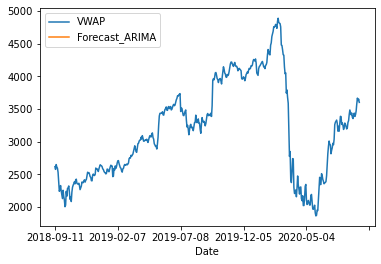

In [29]:
test_data[['VWAP','Forecast_ARIMA']].plot()

<AxesSubplot:xlabel='Date'>

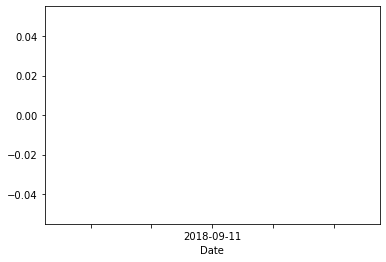

In [30]:
test_data['Forecast_ARIMA'].plot()

In [31]:
pip list

Package                       VersionNote: you may need to restart the kernel to use updated packages.
----------------------------- --------------------
aiohttp                       3.8.1

aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.wea